## IK SL assignment2

In [5]:
from mnist import MNIST
from matplotlib import pyplot
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from sklearn.pipeline import make_pipeline

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn import tree

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
import matplotlib.pyplot as plt

In [11]:
from sklearn.metrics import roc_auc_score

In [19]:
from sklearn.svm import SVC

In [21]:
from sklearn.neighbors import NearestNeighbors

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

In [27]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [28]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

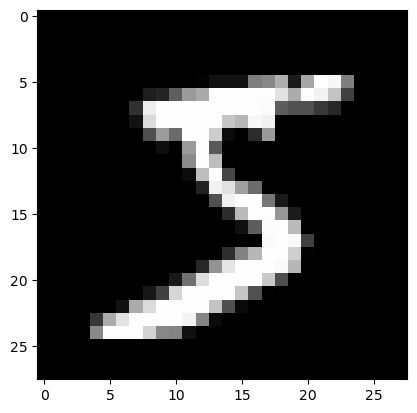

In [29]:
pixels = X[0].reshape((28, 28))
plt.imshow(pixels, cmap='gray')

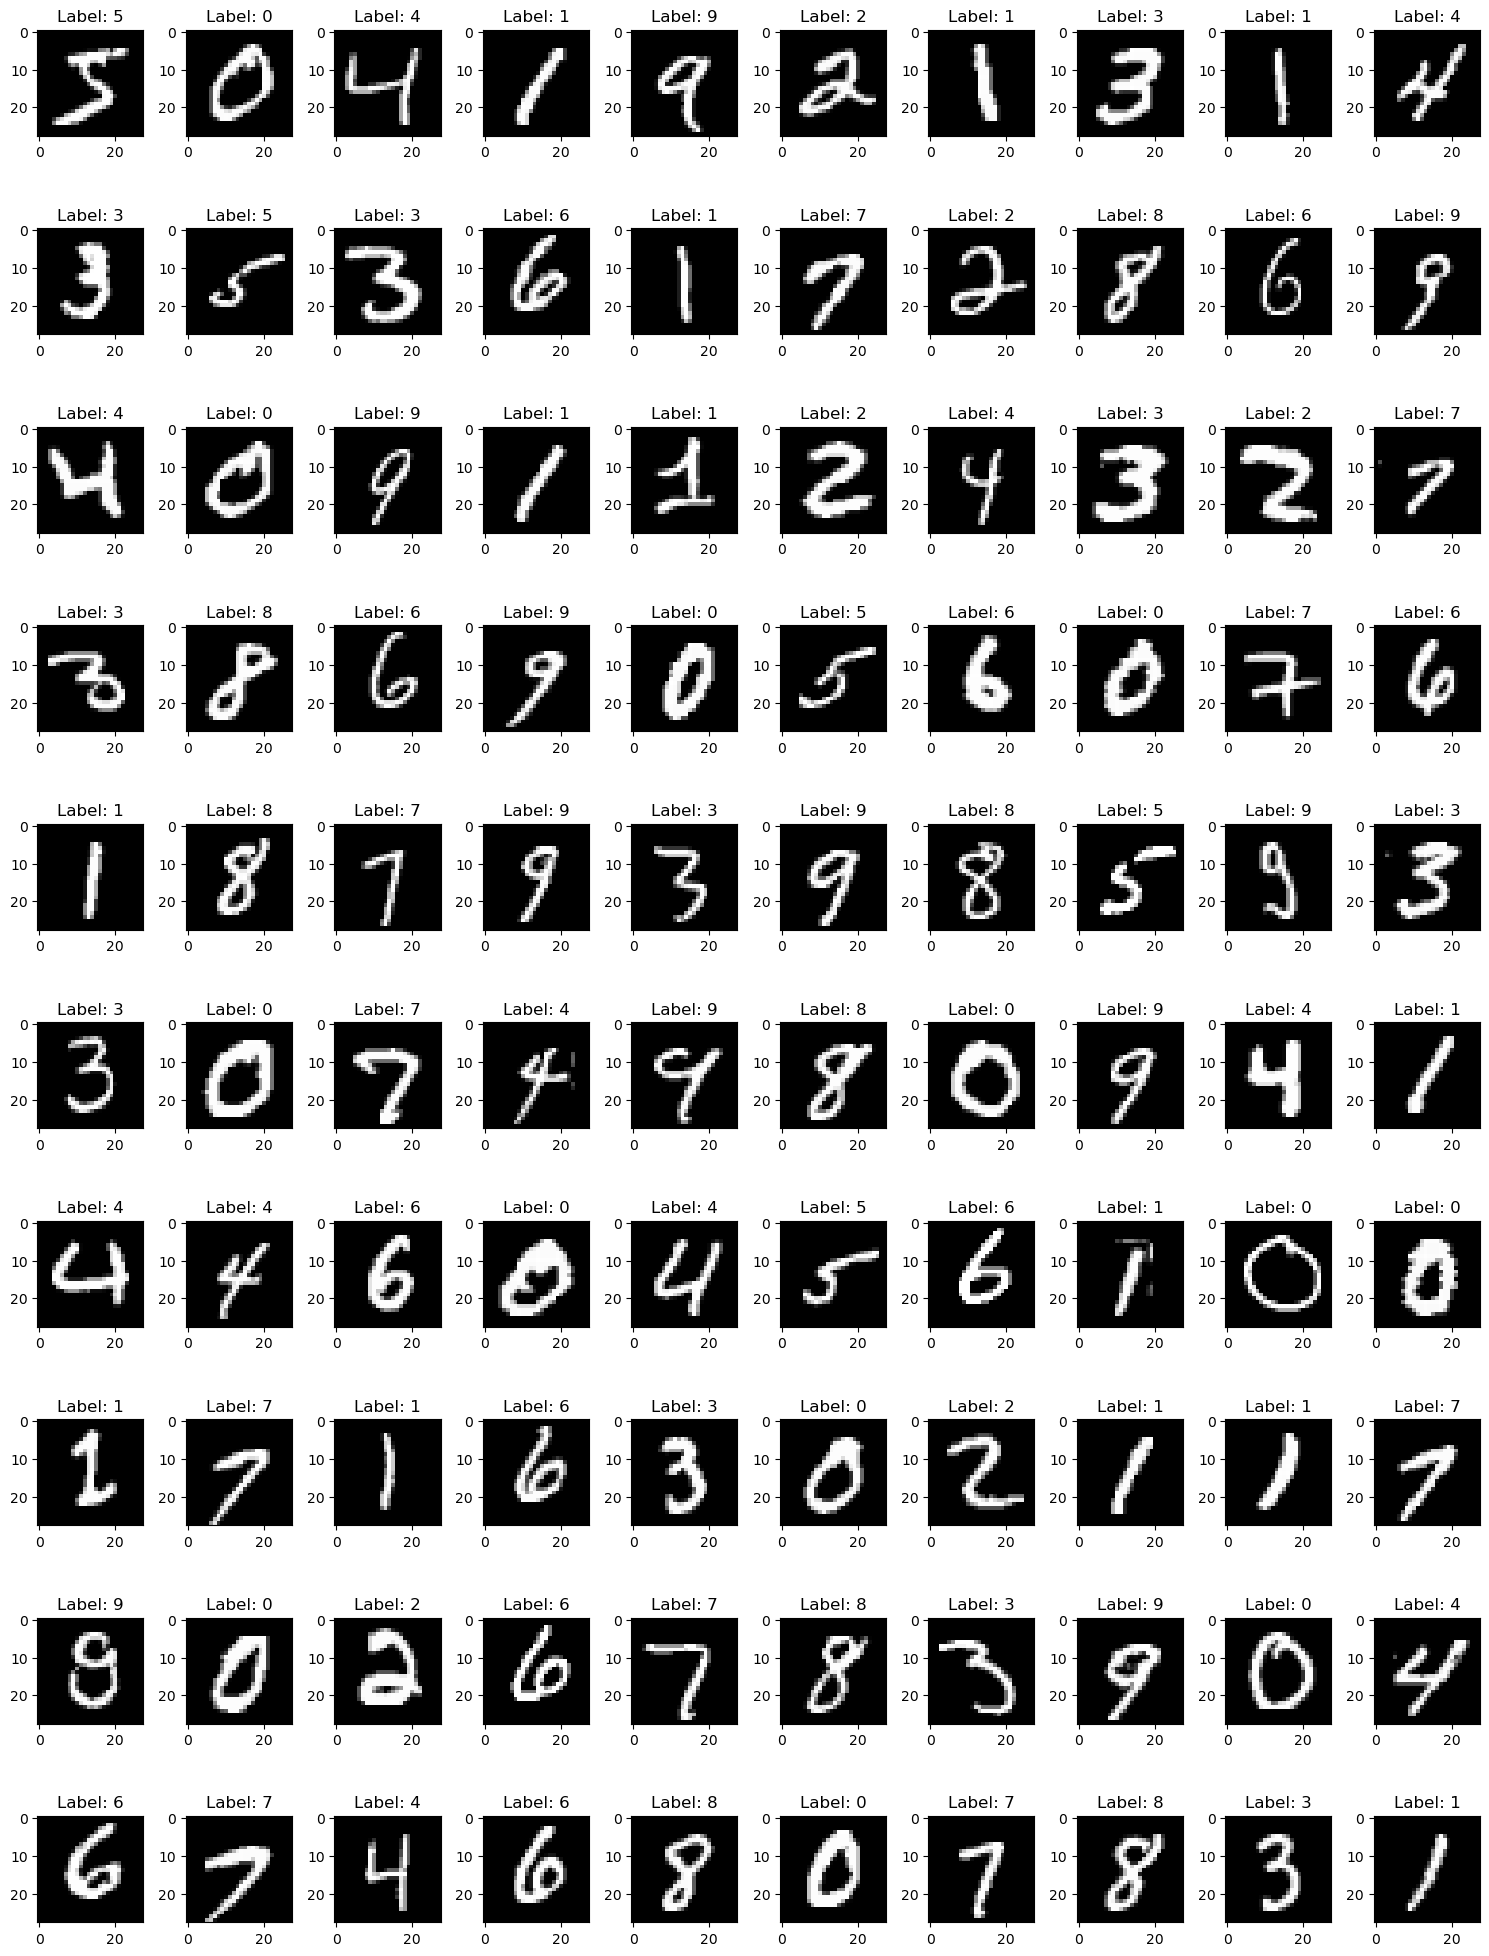

In [17]:
num_row = 10
num_col = 10

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(100):
    ax = axes[i//num_col, i%num_col]
    pixels = X[i].reshape((28, 28))
    ax.imshow(pixels, cmap='gray')
    ax.set_title('Label: {}'.format(y[i]))
plt.tight_layout()
plt.show()

In [18]:
y_5 = (y =='5')*1

In [19]:
y_5

array([1, 0, 0, ..., 0, 1, 0])

In [20]:
sum(y_5)

6313

In [21]:
X_train, X_test, y5_train, y5_test = train_test_split(
    X, y_5, test_size=10000, random_state=42)

* cross-validation
* confusion matrix
* precision
* recall
* f1-score
* roc curve

* SVM
* Decision Trees
* Random Forest
* KNN ...

# single class

### Decision Tree

In [26]:
clf = tree.DecisionTreeClassifier()

In [27]:
param_grid = [{'min_samples_split':[20,30], 'min_samples_leaf':[5,10], 'max_depth':[5,10]}]

In [28]:
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=5, refit=True, n_jobs=-1)

In [29]:
gs = gs.fit(X_train, y5_train)

In [30]:
clf = gs.best_estimator_

In [31]:
# y5_train_pred = clf.predict_proba(X_train)[:, 1]
y5_train_pred = clf.predict(X_train)

In [32]:
np.sum(y5_train_pred)

5065

In [98]:
def print_scores(y, yhat, label):
    print(f"{label} precision_score: {precision_score(y, yhat)} \n")
    print(f"{label} recall_score: {recall_score(y, yhat)} \n")
    print(f"{label} f1_score: {f1_score(y, yhat)} \n")
    print(f"{label} roc_auc_score: {roc_auc_score(y, yhat)} \n")

In [34]:
print_scores(y5_train, y5_train_pred, 'training class 5: decision tree')

training class 5: decision tree precision_score: 0.9168805528134255 

training class 5: decision tree recall_score: 0.8638392857142857 

training class 5: decision tree f1_score: 0.8895699645627814 

training class 5: decision tree roc_auc_score: 0.9280660253996149 



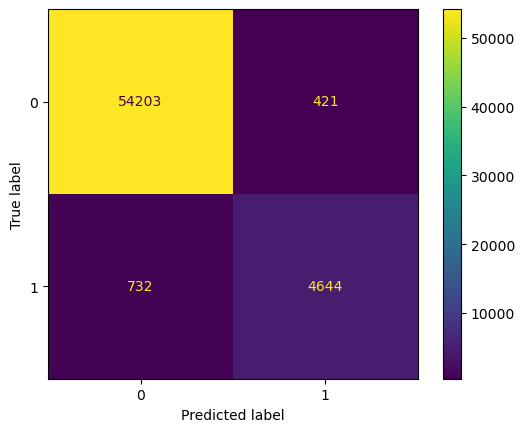

In [35]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_train, y5_train)

In [36]:
y5_test_pred = clf.predict(X_test)

In [37]:
print_scores(y5_test, y5_test_pred, 'testing class 5: decision tree')

testing class 5: decision tree precision_score: 0.8873563218390804 

testing class 5: decision tree recall_score: 0.823906083244397 

testing class 5: decision tree f1_score: 0.8544548976203652 

testing class 5: decision tree roc_auc_score: 0.9065464433655506 



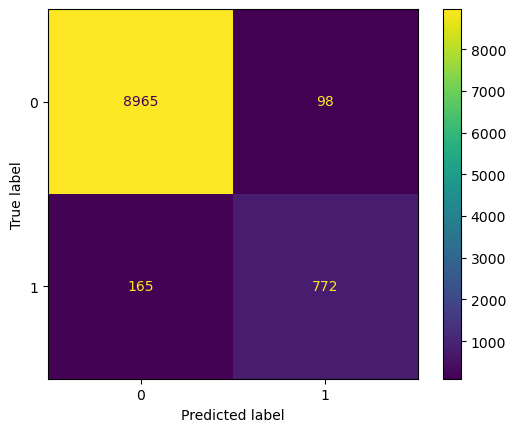

In [38]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y5_test)

### Random Forest

In [40]:
clf = RandomForestClassifier()

In [41]:
param_grid = [{'min_samples_split':[20,30], 'min_samples_leaf':[5,10], 'max_depth':[5,10]}]

In [42]:
param_grid = [{'min_samples_split':[20,30], 'min_samples_leaf':[5,10], 'max_depth':[5,10]}]

In [43]:
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=5, refit=True, n_jobs=-1)

In [44]:
gs = gs.fit(X_train, y5_train)

In [45]:
clf = gs.best_estimator_

In [46]:
# y5_train_pred = clf.predict_proba(X_train)[:, 1]
y5_train_pred = clf.predict(X_train)

In [47]:
np.sum(y5_train_pred)

4407

In [48]:
def print_scores(y, yhat, label):
    print(f"{label} precision_score: {precision_score(y, yhat)} \n")
    print(f"{label} recall_score: {recall_score(y, yhat)} \n")
    print(f"{label} f1_score: {f1_score(y, yhat)} \n")
    print(f"{label} roc_auc_score: {roc_auc_score(y, yhat)} \n")

In [49]:
print_scores(y5_train, y5_train_pred, 'training class 5: Random Forest')

training class 5: Random Forest precision_score: 0.9954617653732698 

training class 5: Random Forest recall_score: 0.8160342261904762 

training class 5: Random Forest f1_score: 0.8968619033016456 

training class 5: Random Forest roc_auc_score: 0.9078340433822915 



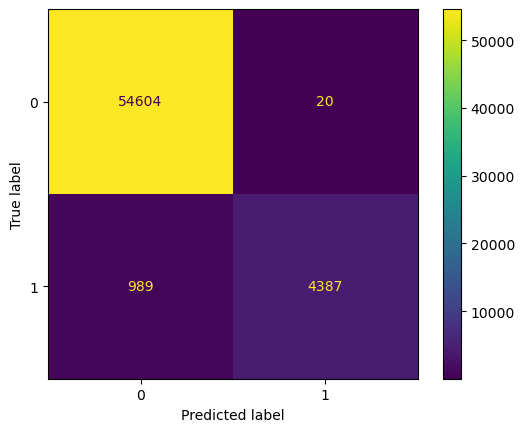

In [50]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_train, y5_train)

In [51]:
y5_test_pred = clf.predict(X_test)

In [52]:
print_scores(y5_test, y5_test_pred, 'testing class 5: Random Forest')

testing class 5: Random Forest precision_score: 0.994475138121547 

testing class 5: Random Forest recall_score: 0.768409818569904 

testing class 5: Random Forest f1_score: 0.8669476219145092 

testing class 5: Random Forest roc_auc_score: 0.8839842318050887 



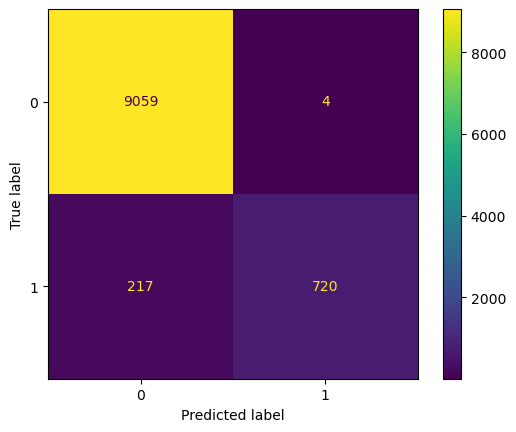

In [53]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y5_test)

In [54]:
# X2 = StandardScaler().fit_transform(X)

In [55]:
# X2_train, X2_test, y5_train, y5_test = train_test_split(
#     # X2, y_5, test_size=10000, random_state=42)

### SVM

In [57]:
clf = SVC()

In [58]:
param_grid = [{'kernel':['rbf'], 'C':[1,0.5,2]}]

In [59]:
# gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=3, refit=True, n_jobs=-1)

In [60]:
# gs = gs.fit(X_train, y5_train)

In [61]:
clf = gs.best_estimator_

In [62]:
# y5_train_pred = clf.predict_proba(X_train)[:, 1]
y5_train_pred = clf.predict(X_train)

In [63]:
np.sum(y5_train_pred)

4407

In [64]:
def print_scores(y, yhat, label):
    print(f"{label} precision_score: {precision_score(y, yhat)} \n")
    print(f"{label} recall_score: {recall_score(y, yhat)} \n")
    print(f"{label} f1_score: {f1_score(y, yhat)} \n")
    print(f"{label} roc_auc_score: {roc_auc_score(y, yhat)} \n")

In [65]:
print_scores(y5_train, y5_train_pred, 'training class 5: SVM')

training class 5: SVM precision_score: 0.9954617653732698 

training class 5: SVM recall_score: 0.8160342261904762 

training class 5: SVM f1_score: 0.8968619033016456 

training class 5: SVM roc_auc_score: 0.9078340433822915 



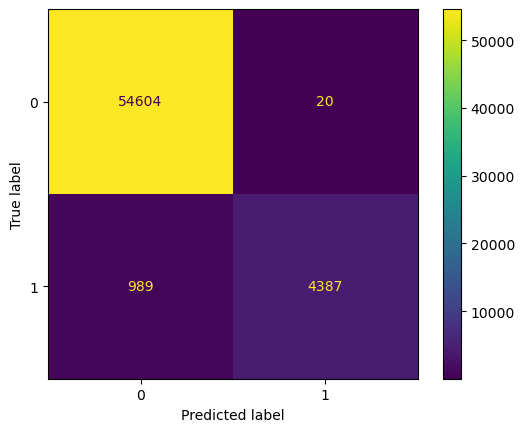

In [66]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_train, y5_train)

In [67]:
y5_test_pred = clf.predict(X_test)

In [68]:
print_scores(y5_test, y5_test_pred, 'testing class 5: SVM')

testing class 5: SVM precision_score: 0.994475138121547 

testing class 5: SVM recall_score: 0.768409818569904 

testing class 5: SVM f1_score: 0.8669476219145092 

testing class 5: SVM roc_auc_score: 0.8839842318050887 



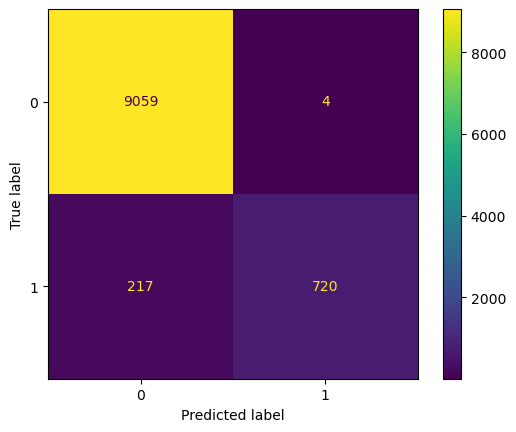

In [69]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y5_test)

### KNN

In [71]:
clf = KNeighborsClassifier()

In [72]:
param_grid = [{'n_neighbors':[5,7,10], 'metric':['cosine']}]

In [73]:
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=3, refit=True, n_jobs=-1)

In [74]:
gs = gs.fit(X_train, y5_train)

In [75]:
clf = gs.best_estimator_

In [76]:
# y5_train_pred = clf.predict_proba(X_train)[:, 1]
y5_train_pred = clf.predict(X_train)

In [77]:
np.sum(y5_train_pred)

5246

In [78]:
def print_scores(y, yhat, label):
    print(f"{label} precision_score: {precision_score(y, yhat)} \n")
    print(f"{label} recall_score: {recall_score(y, yhat)} \n")
    print(f"{label} f1_score: {f1_score(y, yhat)} \n")
    print(f"{label} roc_auc_score: {roc_auc_score(y, yhat)} \n")

In [79]:
print_scores(y5_train, y5_train_pred, 'training class 5: KNN')

training class 5: KNN precision_score: 0.9923751429660694 

training class 5: KNN recall_score: 0.9683779761904762 

training class 5: KNN f1_score: 0.9802297119186594 

training class 5: KNN roc_auc_score: 0.9838228486693449 



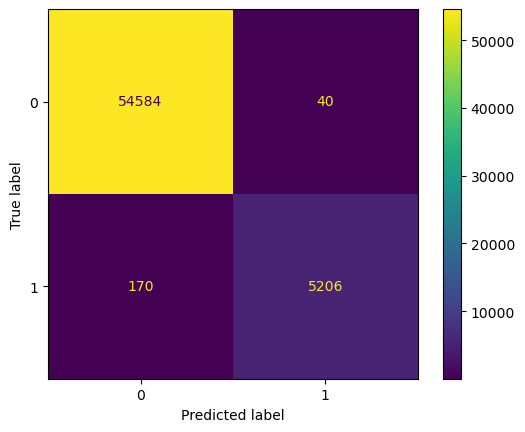

In [80]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_train, y5_train)

In [157]:
y5_test_pred = clf.predict(X_test)

In [159]:
print_scores(y5_test, y5_test_pred, 'testing class 5: KNN')

testing class 5: KNN precision_score: 0.9933701657458563 

testing class 5: KNN recall_score: 0.959445037353255 

testing class 5: KNN f1_score: 0.9761129207383278 

testing class 5: KNN roc_auc_score: 0.9793915024568328 



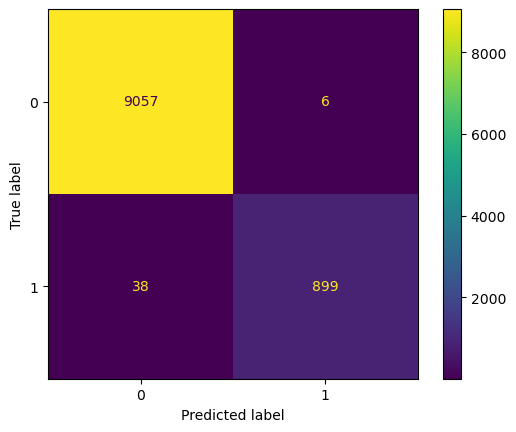

In [160]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y5_test)

# multiclass

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

In [43]:
np.unique(y_train, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([5920, 6725, 6023, 6107, 5918, 5376, 5915, 6238, 5856, 5922]))

In [53]:
clf = RandomForestClassifier(criterion='log_loss')

In [55]:
param_grid = [{'min_samples_split':[20,30], 'min_samples_leaf':[5,10], 'max_depth':[5,10]}]

In [72]:
gs = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, refit=True, n_jobs=-1)

In [74]:
gs = gs.fit(X_train, y_train)

In [75]:
clf = gs.best_estimator_

In [76]:
# y5_train_pred = clf.predict_proba(X_train)[:, 1]
y_train_pred = clf.predict(X_train)

In [102]:
def print_multiclass_scores(y, yhat, label, class_num):
    y = (y==class_num)*1
    yhat = (yhat==class_num)*1
    print_scores(y, yhat, label)

In [114]:
for i in range(10):
    print_multiclass_scores(y_train, y_train_pred, f'Random Forest class {i}:', f'{i}')
    print('\n')

Random Forest class 0: precision_score: 0.9846827133479212 

Random Forest class 0: recall_score: 0.9881756756756757 

Random Forest class 0: f1_score: 0.9864261023522469 

Random Forest class 0: roc_auc_score: 0.9932464916839916 



Random Forest class 1: precision_score: 0.9719365265941816 

Random Forest class 1: recall_score: 0.9836431226765799 

Random Forest class 1: f1_score: 0.9777547853078117 

Random Forest class 1: roc_auc_score: 0.9900289756977456 



Random Forest class 2: precision_score: 0.9595020746887967 

Random Forest class 2: recall_score: 0.9598206873651004 

Random Forest class 2: f1_score: 0.9596613545816733 

Random Forest class 2: roc_auc_score: 0.9776501217361657 



Random Forest class 3: precision_score: 0.9628277464321274 

Random Forest class 3: recall_score: 0.9500573112821352 

Random Forest class 3: f1_score: 0.9563999010961839 

Random Forest class 3: roc_auc_score: 0.9729504636680842 



Random Forest class 4: precision_score: 0.9648972602739726 

Ran

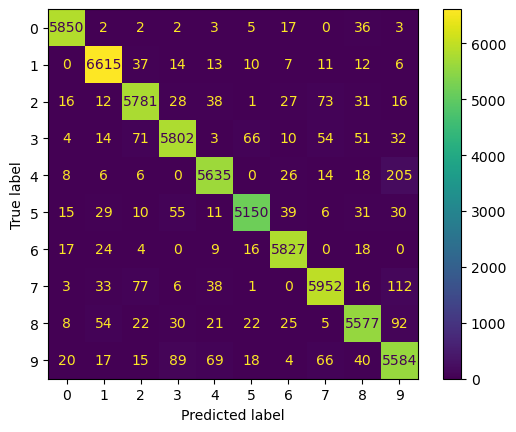

In [116]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)